<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Analisis_resultados_aplicacion_de_kanban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis resultados aplicacion de kanban**


Durante el año pasado tuve la oportunidad de guiar a un equipo que entrega el servicio de gestión de infra a diversas unidades de tecnología dentro de una organización financiera en latam.  

Desarrollamos un enfoque generativo y orgánico para comprender el propósito, ciclo de valor actual, stakeholders y clientes, y co-creamos la implementación de nuevas prácticas que permitieran mejorar la coordinación, visbilidad, colaboración y autonomía de las personas.

Nos guiamos con el pensamiento Lean-Agile y fuimos implementando y experimentando con diversar herramientas, como el value stream mapping, el sistema pull, límites de WIP, radiadores de información, reuniones de sincronismo, por nombrar algunas.

Algunos de los resultados que se han obtenido son mejora de la velocidad, reducción de tiempos de entrega y mayor predecibilidad y consistencia de la experiencia de los clientes internos.

En este documento quiero mostrar un ejemplo de como se pueden capturar datos línea base del servicio de una variable relevante (en nuestro caso el tiempo de entrega = leadtime), y luego los datos producto de los tratamientos aplicados, para verificar si existe una mejora estadisticamente significativa y si el efecto producido es sustantivo para el negocio.


Se analizarán 3 momentos:

*   Momento 1 =  situación actual, nuestra línea base (Junio), 
*   Momento 2 = medición post primer ciclo de tratamiento (Agosto)
*   Momento 3 = medición post segundo ciclo de tratamiento (Enero)



A modo de ejemplo presentamos anonimizados los tiempos de entrega (leadtime) :

In [49]:
#Data set - Momento 1
junio = (1.032453704, 0.336516204, 1.019085648, 0.212997685, 55.88583333, 0.081122685, 0.309884259, 0.916701389, 1.026053241, 0.234409722, 0.895960648, 0.485868056, 0.747569444, 0.749305556, 1.02880787, 0.755381944, 7.006030093, 5.217743056, 7.574050926, 8.062037037, 57.01328704, 57.09304398, 57.04, 0.018287037, 2.064155093, 3.1578125, 6.217615741, 6.219421296, 6.214768519, 5.969074074, 8.867291667, 10.72746528, 12.15907407, 12.1621412, 13.06868056, 11.89347222, 12.99181713, 14.75262731, 16.2008912, 17.06596065, 14.74576389, 0.719178241, 0.959872685, 1.861805556, 0.229270833, 0.382430556, 1.047766204, 1.09025463, 2.793425926, 4.794884259, 4.79662037, 4.0721875, 3.17306713, 6.99037037, 7.859074074,5.763912037, 12.01021991, 10.77895833, 11.32315972, 17.1071412, 0.877164352, 0.762418981, 0.032974537, 5.067118056, 3.788958333, 7.821423611, 20.77666667, 21.75533565, 24.1483912, 26.97327546)

In [50]:
#Data set - Momento 2
agosto = (22.95502315, 13.83863426, 13.94453704, 14.0578588, 12.02247685, 9.229791667, 6.900393519, 2.980185185, 2.918784722, 2.863055556, 6.928993056, 1.904884259, 1.235219907, 1.233611111, 0.159456019, 1.075960648, 0.096655093, 1.078958333, 44.84554398, 19.92202546, 15.07412037, 13.94685185, 11.93701389, 11.11953704, 5.303553241, 6.034641204, 0.0421875, 1.094351852, 0.218969907, 0.006018519, 0.16068287, 0.161574074, 0.884293981, 0.071828704, 1.766782407, 1.850185185, 0.899490741, 0.030798611, 28.26549769, 11.90096065, 13.90553241, 11.73510417, 8.050578704, 6.154884259, 5.87806713, 6.805532407, 5.906747685, 0.213344907, 2.816284722, 1.711863426, 0.797407407, 0.940810185, 0.122106481, 0.035555556, 0.876388889, 0.91369213, 21.49112269, 14.91744213, 6.971076389, 5.753726852, 5.776851852, 4.015300926, 4.280486111, 4.872094907, 2.727314815, 4.028101852, 0.252881944, 0.830092593, 0.914456019, 1.800613426, 1.192604167, 0.747743056, 0.993611111, 0.098622685, 0.812673611, 0.685405093)

In [51]:
#Data set - Momento 3
#leadtime tipologia b
tipo_b = (0.06, 0.47, 0.47, 0.58, 1.04, 0.37, 0.11, 1.18, 0.32, 1.84, 2.11, 1.49, 0.64, 0.74, 0.74, 1.06, 0.28, 0.09, 0.92, 2.39, 2.42, 0.38, 3.51, 1.11, 1.26, 1.54, 0.01, 1.16, 0.25, 0.75, 3.60, 3.44, 4.64, 4.80, 3.14, 4.89, 5.63)
#leadtime tipologia a
tipo_a = (0.37, 0.09, 0.17, 1.53, 1.13, 0.01, 1.13, 1.70, 0.44, 0.65, 1.43, 0.93, 1.89, 1.94, 3.39, 3.98, 1.66, 7.00, 8.16)
#leadtime enero
enero = (tipo_a + tipo_b)

Visualizaciones y estadística descriptiva:

In [4]:
#Importamos librerias de la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib

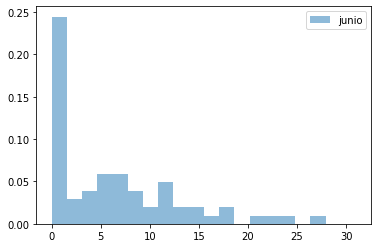

muestra junio:  70
media junioo:  9.271111276214285
mediana junio:  5.142430556
cuartil 3 junio:  11.981032987499999
desv. std junio:  13.32735528958322


In [52]:
#Momento 1

plt.hist(junio, bins=20, range=[0, 31], alpha=0.5, density="true", label="junio")

plt.legend()
plt.show()

muestra_jun = np.size(junio)
media_jun = np.mean(junio)
mediana_jun = np.median(junio)
per75_jun = np.percentile(junio, 75)
sigma_jun = np.std(junio)

print('muestra junio: ', muestra_jun)
print('media junioo: ', media_jun)
print('mediana junio: ', mediana_jun)
print('cuartil 3 junio: ', per75_jun)
print('desv. std junio: ', sigma_jun)

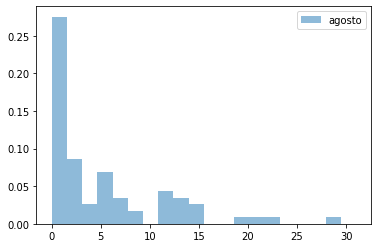

muestra agosto:  76
media agosto:  5.802467257868421
mediana agosto:  2.7717997685
cuartil 3 agosto:  7.24095196775
desv. std agosto:  7.674260713774836


In [66]:
#Momento 2

plt.hist(agosto, bins=20, range=[0, 31], alpha=0.5, density="true", label="agosto")

plt.legend()
plt.show()

muestra_ago = np.size(agosto)
media_ago = np.mean(agosto)
mediana_ago = np.median(agosto)
per75_ago = np.percentile(agosto, 75)
sigma_ago = np.std(agosto)

print('muestra agosto: ', muestra_ago)
print('media agosto: ', media_ago)
print('mediana agosto: ', mediana_ago)
print('cuartil 3 agosto: ', per75_ago)
print('desv. std agosto: ', sigma_ago)

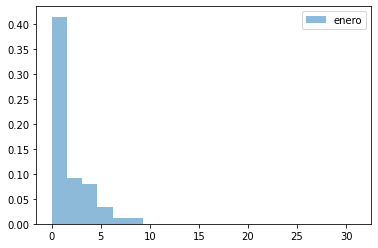

muestra enero:  56
media enero:  1.7326785714285715
mediana enero:  1.13
cuartil 3 enero:  2.18
desv. std enero:  1.7904772818116608


In [55]:
#Momento 3

plt.hist(enero, bins=20, range=[0, 31], alpha=0.5, density="true", label="enero")

plt.legend()
plt.show()

muestra_ene = np.size(enero)
media_ene = np.mean(enero)
mediana_ene = np.median(enero)
per75_ene= np.percentile(enero, 75)
sigma_ene = np.std(enero)

print('muestra enero: ', muestra_ene)
print('media enero: ', media_ene)
print('mediana enero: ', mediana_ene)
print('cuartil 3 enero: ', per75_ene)
print('desv. std enero: ', sigma_ene)



Al revisar los resultados entre momento 1 y momento 2, se observa una reducción en los tiempos de entrega promedio y su desviación estandar, y con respecto a las histogramas en momento 1 se observan 2 o 3 distribuiciones superpuestas, mientras que en momento 2 la distribución de los datos comienza a tomar la forma de una distribución tipo gamma. 

En el siguiente apartado realizaremos un análisis estadístico aplicando prueba de T conforme a los pasos explicitados en este documento: [Tamaño del efecto y potencia estadística](https://github.com/robertomoragad/Estadistica/blob/master/Tama%C3%B1o_del_Efecto_y_Potencia_Estad%C3%ADstica_en_la_prueba_de_T_de_Student_para_dos_grupos.ipynb)



##1) Primero vamos a comparar Momento 1 V/S Momento 2, para verificar si los resultados del primer ciclo de mejoras, son estadísticamente y clínicamente significativos.

**Análisis post-hoc Prueba T muestras independientes (varianzas desiguales)**

Se quiere estudiar el efecto de aplicar un nuevo método de trabajo (kanban) en los tiempos de entrega de los requerimientos de infraestructura de ambientes y datos, para ello se mide el tiempo transcurrido desde que se reciben los requerimientos hasta que estos han sido completados (en días), esto en dos grupos de trabajos seleccionados al azar.

En vista de los resultados ¿Se puede considerar que el nuevo método reduce los tiempos de desarrolo y entrega, para un nivel de significancia del 5%?


*  Grupo Experimental: Grupo de requerimientos trabajados con nuevo método (primer ciclo de mejora) (n= 76; Media= 5.802; y Sigma= 7.674)


*  Grupo Control: Grupo de requerimientos trabajados en modo tradicional (n= 70; Media= 9.271; y Sigma= 13.424)




```
Nota 1: En este ejemplo aplicaremos la prueba t Student de muestras independientes 
con varianza distintas, aquí estimaremos los grados de libertad con una fórmula en el paso 3.
```
```
Nota 2: Este ejemplo corresponde a un caso real desarrollado en la organización de 
Gestión de Ambientes (infraestructura TI) de una compañía Financiera - año 2020.
```


In [58]:
#Analisis post hoc utilizando t Student, con desigual varianza***

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1 (control)
n_1 = 70
xbarra_1 = 9.271
S_1 = 13.424

#muestra 2 (experimental)
n_2 = 76
xbarra_2 = 5.802
S_2 = 7.674


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias


#Estimar grados de libertad cuando varianzas poblacionales no son iguales
# gl = (S1**2 /n1 + S2**2 /n2)**2 / ( ( (S1**2/n1)**2 / (n1-1) ) + ( (S2**2/n2)**2 / (n2-1) ) )
gl = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  ( ( (S_1**2/n_1)**2 / (n_1-1) ) + ( (S_2**2/n_2)**2 / (n_2-1) ) )
print('estimacion gl: ', gl)

#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=gl)
print ('T critico: ',Tcritico)


#Estimar mancomunado de la varianza poblacional (S pooled) =>  #NO APLICA para calcular IC ya que Varianzas son diferentes
#Se aplica la varianza mancomunada para calcular 'd Cohen' en el ultimo paso, por esta razon se calcula aqui:
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)


#como las varianzas son diferentes, el calculo del 'Sigma diferencias  medias' es de la siguiente forma:
S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=gl)
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

estimacion gl:  107.80353481895833
T critico:  1.9822144079593498
Varianza mancomunada:  117.01966141666668
Sigma poblacion : 10.817562637519908
S diferencia medias:  1.8300851646233396
IC diferencia medias al 0.95 NC :  -0.15862118110904122 7.096621181109043
IC diferencia medias al 0.95 NC :  (-0.15862118110904122, 7.096621181109043)


In [60]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba
#como varianzas no son iguales, aqui el denominador es el sigma de diferencias calculado en paso #3
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  1.895540200564369
p-value (significancia estadística):  0.06002471425837541


In [61]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en días correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#otra forma simple para calcular Beta con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= n_1 + n_2 - 2)
print('otra forma beta: ', beta1)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#aqui utilizaremos la desv. mancomunada (S pooled)
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S medias 2 sigmas)

dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.53447455815925
otra forma beta:  0.53447455815925
Potencia de la prueba:  0.46552544184074995
d Cohen:  0.32068221985311496
diferencia bruta:  3.469000000000001


Conclusión:

Las diferencias no son estadísticamente significativas (p-value: 0.06), el uso del método kanban en el desarrollo de requerimientos tiene un efecto bajo (d Cohen pequeño) en los tiempos de procesamiento y la potencia estadística es muy baja (0.46).

Por tanto no se puede afirmar que el tratamiento aplicado en el primer ciclo de mejoras ha reducido de forma sustantiva los tiempos de desarrollo.

Con base en los resultados anteriores, se siguió acompañando al equipo en el cambio de lógica de trabajo, y se formentó la aplicación y amplificación de Kanban a todo el servicio.  A continuación se presentarán los resultados.

##2) Comparación Momento 2 V/S Momento 3, para verificar si los resultados del segundo ciclo de mejoras, son estadísticamente y clínicamente significativos.

**Análisis post-hoc Prueba T muestras independientes (varianzas desiguales)**

Se quiere estudiar el efecto de aplicar un nuevo método de trabajo (kanban) en los tiempos de entrega de los requerimientos de infraestructura de ambientes y datos, para ello se mide el tiempo transcurrido desde que se reciben los requerimientos hasta que estos han sido completados (en días), esto en dos grupos de trabajos seleccionados al azar.

En vista de los resultados ¿Se puede considerar que el nuevo método reduce los tiempos de desarrolo y entrega, para un nivel de significancia del 5%?


*  Grupo Experimental: Grupo de requerimientos trabajados con nuevo método (segundo ciclo de mejora) (n= 56; Media= 1.73; y Sigma= 1.79)

*  Grupo Control: Grupo de requerimientos trabajados con algunas prácticas kanban (n= 76; Media= 5.802; y Sigma= 7.674)




```
Nota 1: En este ejemplo aplicaremos la prueba t Student de muestras independientes 
con varianza distintas, aquí estimaremos los grados de libertad con una fórmula en el paso 3.
```
```
Nota 2: Este ejemplo corresponde a un caso real desarrollado en la organización de 
Gestión de Ambientes (infraestructura TI) de una compañía Financiera - año 2020.
```


In [63]:
#Analisis post hoc utilizando t Student, con desigual varianza***

## 1) cargar datos muestras: tamaño (n), media (xbarra) y sigma (S)
#muestra 1 (control)
n_1 = 76
xbarra_1 = 5.802
S_1 = 7.674

#muestra 2 (experimental)
n_2 = 56
xbarra_2 = 1.73
S_2 = 1.79


## 2) Determinar Nivel de Significancia
alpha = 0.05


## 3) Estimar el IC de la diferencia de medias


#Estimar grados de libertad cuando varianzas poblacionales no son iguales
# gl = (S1**2 /n1 + S2**2 /n2)**2 / ( ( (S1**2/n1)**2 / (n1-1) ) + ( (S2**2/n2)**2 / (n2-1) ) )
gl = (S_1**2 /n_1 + S_2**2 /n_2)**2  /  ( ( (S_1**2/n_1)**2 / (n_1-1) ) + ( (S_2**2/n_2)**2 / (n_2-1) ) )
print('estimacion gl: ', gl)

#calcular T critico 2 colas con Scipy
Tcritico = stats.t.ppf(1 - (alpha/2), df=gl)
print ('T critico: ',Tcritico)


#Estimar mancomunado de la varianza poblacional (S pooled) =>  #NO APLICA para calcular IC ya que Varianzas son diferentes
#Se aplica la varianza mancomunada para calcular 'd Cohen' en el ultimo paso, por esta razon se calcula aqui:
var = ( S_1**2 *(n_1 - 1) + S_2**2 *(n_2 - 1)) / (n_1 + n_2 - 2)
S = np.sqrt(var)
print('Varianza mancomunada: ',var)
print('Sigma poblacion :', S)


#como las varianzas son diferentes, el calculo del 'Sigma diferencias  medias' es de la siguiente forma:
S_dif = np.sqrt( (S_1**2 / n_1) + (S_2**2 / n_2) )
print('S diferencia medias: ',S_dif)

#IC diferencia medias al 1-alpha:
LI = (xbarra_1 - xbarra_2) - Tcritico * S_dif
LS = (xbarra_1 - xbarra_2) + Tcritico * S_dif
print('IC diferencia medias al', 1-alpha, 'NC : ', LI, LS)

#otra forma con Scipy
IC = stats.t.interval(1-alpha, loc=xbarra_1 - xbarra_2, scale=S_dif, df=gl)
print('IC diferencia medias al', 1-alpha, 'NC : ', IC)

estimacion gl:  85.84656602108966
T critico:  1.9879848952506725
Varianza mancomunada:  35.33074000000001
Sigma poblacion : 5.943966689004911
S diferencia medias:  0.9121886449962806
IC diferencia medias al 0.95 NC :  2.2585827521282154 5.885417247871783
IC diferencia medias al 0.95 NC :  (2.2585827521282154, 5.885417247871783)


In [64]:
## 4) plantear hipotesis
 # H0:  Mu 1 = Mu 2
 # H1:  Mu 1 ≠ Mu 2

#regla decision (2 colas)
 # no rechazar H0 si: -Tcritico <= T <= Tcritico
 # rechazar HO si: T < -Tcritico o T > Tcritico


## 5) Calcular el estadístico T crítico a emplear
Tcritico = Tcritico #fue obtenido en paso anterior


## 6) Determinar el tipo de test, una o dos colas.
#como la hipotesis alternativa es del tipo “diferente de” se trata de un test de dos colas
#Nota: Se recomienda utilizar el contraste bilateral para estos análisis dado que éstos 
#requieren una mayor diferencia para detectar una misma potencia


## 7 ) Calcular el estadístico T de prueba
#como varianzas no son iguales, aqui el denominador es el sigma de diferencias calculado en paso #3
T = ( xbarra_1 - xbarra_2 - 0) / S_dif
print('T prueba: ', T)

## 8) Calcular el p-value y comparación con el nivel de significancia establecido.
#calcular p-value
pvalue = 1 - (stats.t.cdf(T, df=(n_1 + n_2 -2))) #T prueba se encuentra en cola derecha
print('p-value (significancia estadística): ', pvalue*2) #2 colas multiplicar por 2

## 9) Concluir prueba de hipotesis:
#como T prueba > Tcritico o como p-value menor a alpha, se rechaza H0, las medias son diferentes.

T prueba:  4.463988915381207
p-value (significancia estadística):  1.7262930006811672e-05


In [65]:
## 10) Calcular la potencia de la prueba (1 - beta)

#buscar el valor en días correspondiente al T critico
x = 0 + (Tcritico * S_dif)# por la derecha
#print('X promedio para T=',Tcritico,': ',x)

#otra forma mas simple con Scipy usando ppf
x_b = stats.t.ppf((1-alpha/2), df=n_1 + n_2 - 2 , loc=0, scale=S_dif)
#print('X promedio para T=',Tcritico,': ',x_b)


#Calcular Beta (error tipo II)
#forma simple con Scipy
beta = stats.t.cdf(x, df=n_1 + n_2 -2, loc=xbarra_1-xbarra_2, scale=S_dif)
print('Beta: ',beta)

#otra forma simple para calcular Beta con Scipy
beta1 = stats.t.cdf(Tcritico-T, df= n_1 + n_2 - 2)
print('otra forma beta: ', beta1)

#Calcular Potencia estadística (1- beta)
print('Potencia de la prueba: ', 1-beta)


## 11) Calcular el tamaño del efecto
#aqui utilizaremos la desv. mancomunada (S pooled)
#d de Cohen para T-TEST INDEPENDIENTES: (diferencia medias grupos / S medias 2 sigmas)

dif_bruta = (xbarra_1 - xbarra_2)
dCohen = (xbarra_1 - xbarra_2) / S
print('d Cohen: ', dCohen)
print('diferencia bruta: ', dif_bruta)

Beta:  0.007285864314577631
otra forma beta:  0.007285864314577631
Potencia de la prueba:  0.9927141356854223
d Cohen:  0.6850644044712335
diferencia bruta:  4.071999999999999


Conclusión:

Las diferencias son estadísticamente significativas (p-value: 0.00), el uso del método kanban en el desarrollo de requerimientos tiene un efecto relevante (d Cohen media grande) en los tiempos de procesamiento y la potencia estadística es alta (0.99).

Por tanto se puede afirmar que el tratamiento reduce de forma sustantiva los tiempos de desarrollo. Se recomienda sostener el enfoque de mejora evolutivo dentro del servicio.



---
Espero puedan servir de ejemplo para medir los efectos de la 
aplicación de nuevas formas de trabajo dentro de los equipos o desarrollo de productos.  En este caso también se observa que la mejora real de resultados, no siempre pueden obtenerse en corto plazo, o como en este caso que si pareceriera pero fue sólo una ilusión. Por esta razón debemos seguir trabajando en equipo con perseverancia y sacrificio para crear resultados reales y sostenibles en el tiempo.  

Para cosechar primero se debe sembrar, como en este caso, donde el equipo pudo pasar de entregar en promedio en 9 días a menos 2 días en un lapso de 6 meses, esto es una reducción cercana al 80%, donde además obtuvieron un incremento de la velocidad (throughtput) del 40%.


<img src='https://drive.google.com/uc?export=view&id=1YXEaRR2ogFvmVklJfjI12ncYszeq2xlO' width="1000" align="left" style="margin-right: 20px"> 
<br>



----
¿Tienes alguna pregunta o sugerencia? Déjame comentarios en https://www.linkedin.com/in/robertomoragad/ y haré todo lo posible para responder.